# Predict Jumpstarter

## What to Expect:
1. Electricity Shortfall Challenge
1. "Exploring" the data (EDA)
2. Feature Engineering
3. Modeling
4. Kaggle: How to submit and challenge!

---

## Objectives
* Explain The need for EDA and Feature Engineering process.
* Use libraries and pep 8 best coding practices. Also utilise visualisation's and data cleaning practices.
* Compare and Contrast the various features, models and model performances by evaluating their error scores.
* Justifying the use of various feature engineering techniques and provide details to the ideas utilised for model selection and EDA.
* Create a detailed project that uses EDA, feature engineering and modeling best practices.

---

---

## 1. Electricity Shortfall Challenge

<img src = "https://media.istockphoto.com/id/1300175334/photo/electricity-transmission-towers-with-glowing-wires-against-the-starry-sky.jpg?s=612x612&w=0&k=20&c=M2axLuAFNGBbMAZlbFByrPNWfSxXAMWGck3dJdmEEnk=" width = 500 >

We have weather data for the following cities of Spain:

* Madrid
* Valencia
* Seville
* Bilbao
* Barcelona
  
The weather categories in the dataset include:

* wind_speed
* wind_degree
* rain_1h
* rain_3h
* humidity
* clouds_all
* pressure
* snow_3h
* weather_id
* temp_max
* temp

---

## Load Data so we can covert after we create our output

In [ ]:
# Load your libraries!
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the CSV file into a DataFrame (Train Data)
df_train = pd.read_csv('df_train.csv')

In [ ]:
# Read the CSV file into a DataFrame (Test Data)
df_test = pd.read_csv('df_test.csv')

In [ ]:
# Submission Sample
sample = pd.read_csv('sample_submission_load_shortfall (1).csv')

In [ ]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [ ]:
#How my submission should look like!
sample.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,0
1,2018-01-01 03:00:00,1
2,2018-01-01 06:00:00,2
3,2018-01-01 09:00:00,3
4,2018-01-01 12:00:00,4


---

## 2."Exploring" the data (EDA)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [ ]:
#Discriptive Stats
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [ ]:
df_train.shape

(8763, 49)

In [ ]:
df_test.shape

(2920, 48)

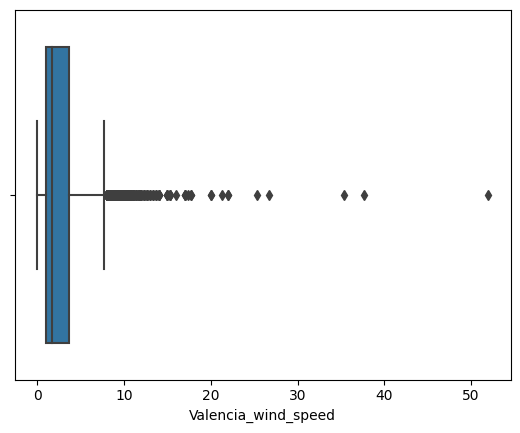

In [ ]:
# Create a horizontal boxplot
sns.boxplot(x=df_train['Valencia_wind_speed'])

# Show the plot
plt.show()

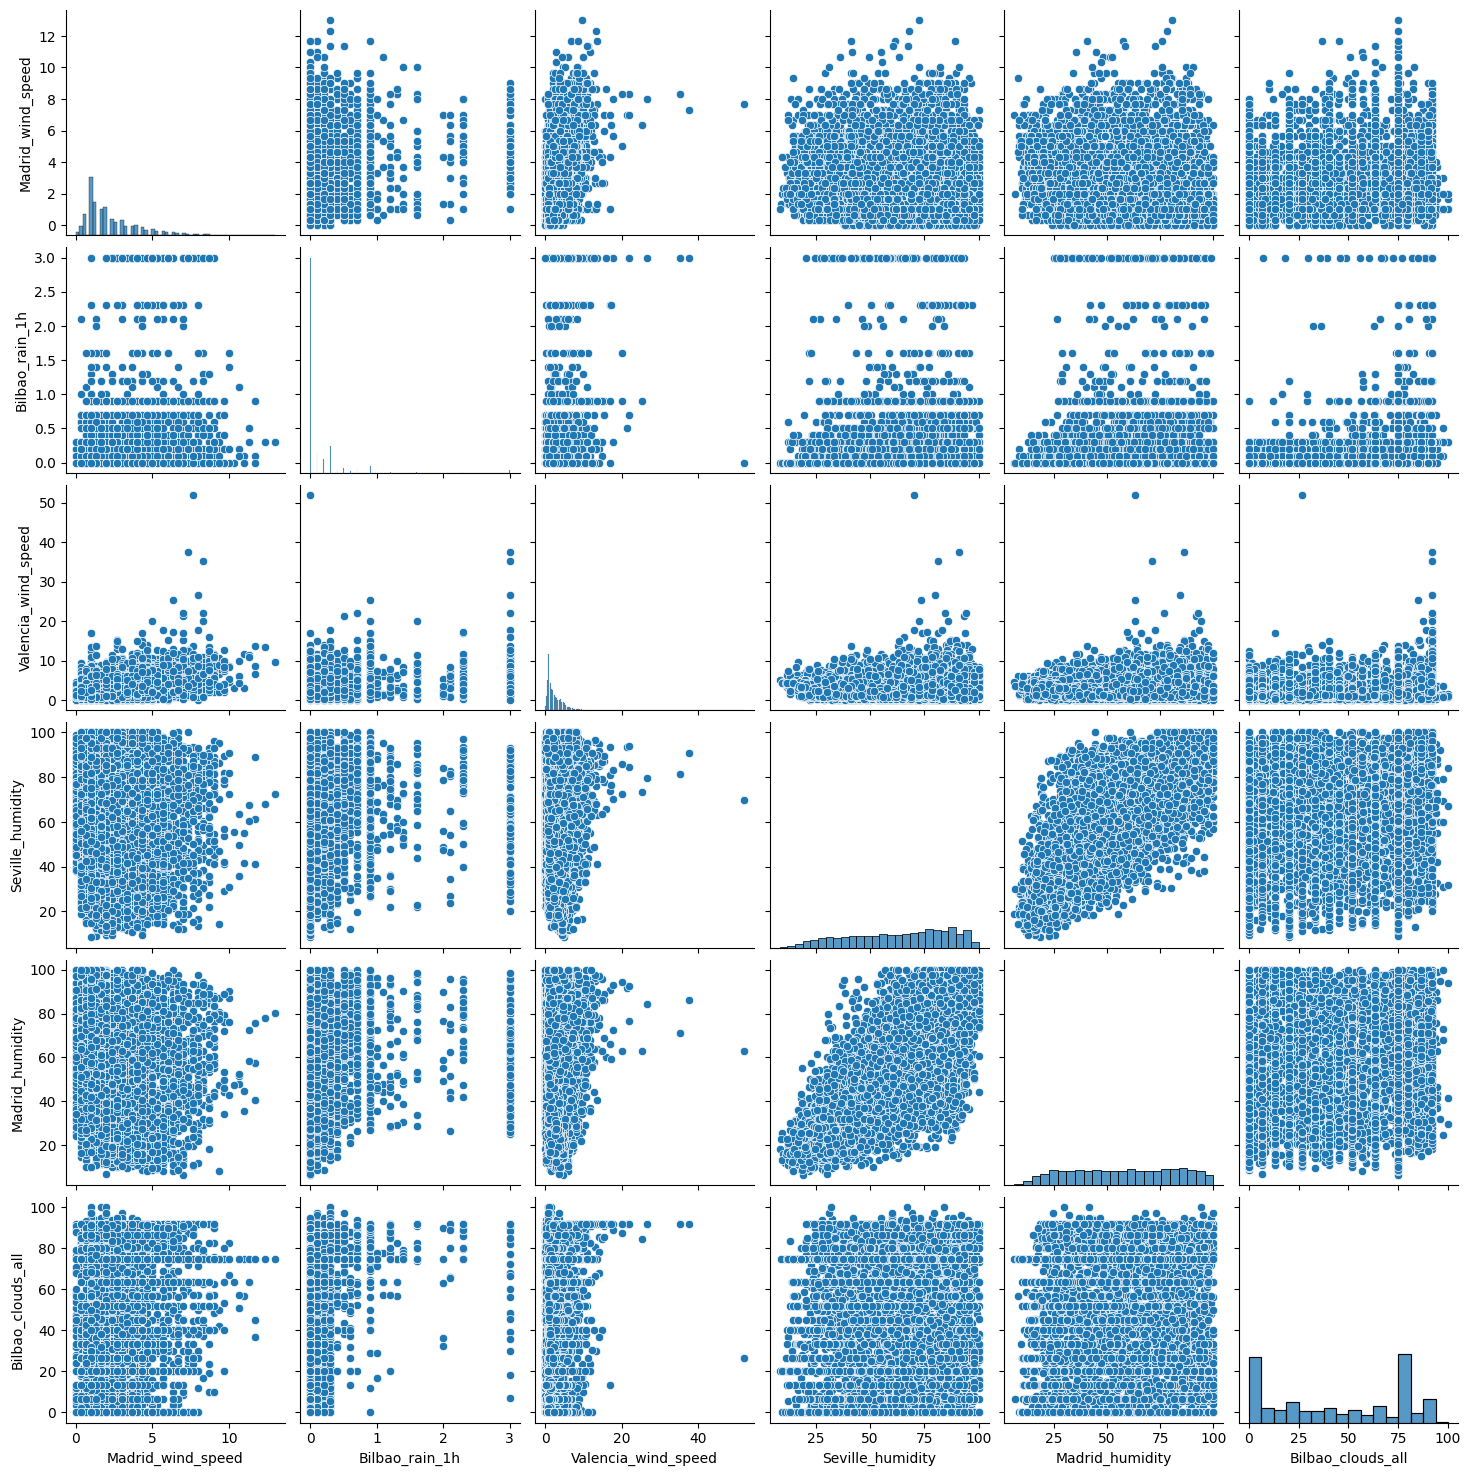

In [ ]:
sns.pairplot(df_train[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
                       'Valencia_wind_speed', 'Seville_humidity',
                       'Madrid_humidity', 'Bilbao_clouds_all']])

<Axes: >

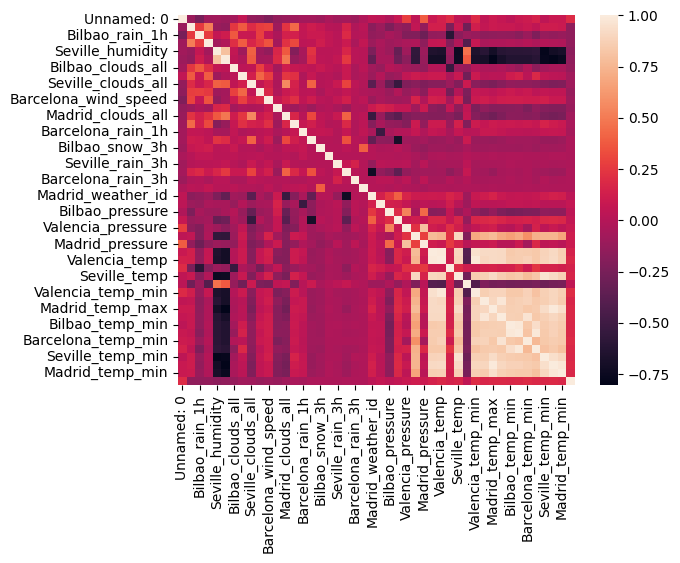

In [ ]:
sns.heatmap(df_train.corr())

<Axes: >

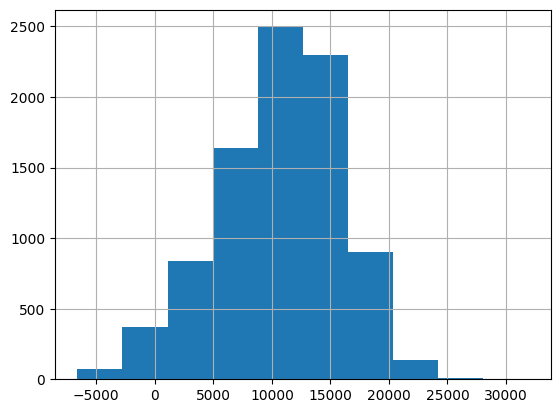

In [ ]:
df_train.load_shortfall_3h.hist()

In [ ]:
#How to look at the Mode
mode = df_train['Valencia_wind_speed'].mode()
#How to look at the Median
median = df_train['Valencia_wind_speed'].median()
#How to look at the Mean
mean = df_train['Valencia_wind_speed'].mean()

print(f'mean: {mean}')
print(f'median: {median}')
print(f'mode: {mode}')

mean: 2.5862718247179504
median: 1.6666666667
mode: 0    1.0
dtype: float64


---

## 3. Feature Engineering

In [ ]:
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [ ]:
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

### Date time

#### Syntax
```python
# Assuming 'date_column' is the column you want to convert to datetime
df['date_column'] = pd.to_datetime(df['date_column'])

# Now 'date_column' is in datetime format
```

In [ ]:
df_train['Time'] = pd.to_datetime(df_train['time'])

In [ ]:
# Assuming 'date_column' is the datetime column
df_train['hour'] = df_train['Time'].dt.hour

In [ ]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Time,hour
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015-01-01 03:00:00,3
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015-01-01 06:00:00,6
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015-01-01 09:00:00,9
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015-01-01 12:00:00,12
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015-01-01 15:00:00,15


Handling **null values and outliers** in your dataset is an __important__ step in the data preprocessing phase.
The goal is to mitigate these issues. How would you approach these issues?

---

## 4. Modeling

In [ ]:
# split the diabetes dataset into the dependant and target variables: "X" and "y"
X = df_train.drop(['load_shortfall_3h', 'time','Time', 'hour','Valencia_wind_deg', 'Seville_pressure'], axis =1)
y = df_train['load_shortfall_3h']

In [ ]:
# Split the data into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 47)

In [ ]:
# Fit  model
from sklearn.tree import DecisionTreeRegressor

# Create model object
dt = DecisionTreeRegressor()

# Train model
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Create New predicted "y"
y_pred_df_train = dt.predict(X_val)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred_df_train)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 5008.717313352206


In [ ]:
df_test_2 = df_test.copy()
df_test_2 = df_test_2.drop(['time', 'Valencia_wind_deg', 'Seville_pressure'], axis =1)
df_train_2 = df_train.copy()
df_train_2 = df_train_2.drop(['time', 'Valencia_wind_deg', 'Seville_pressure'], axis =1)

In [ ]:
# Create New predicted "y"
y_pred_df_test = dt.predict(df_test_2)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y[:2920], y_pred_df_test)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 5270.142823357278


---

### Convert to CSV

In [ ]:
dataframe = pd.DataFrame(y_pred_df_test, columns=['load_shortfall_3h'])  # Convert to DataFrame
time = df_test['time']
result = time.to_frame().join(dataframe)  # Convert 'time' to a DataFrame and perform join
result

,time,load_shortfall_3h
0,2018-01-01 00:00:00,11428.025013
1,2018-01-01 03:00:00,11428.025013
2,2018-01-01 06:00:00,11428.025013
3,2018-01-01 09:00:00,11428.025013
4,2018-01-01 12:00:00,11428.025013
...,...,...
2915,2018-12-31 09:00:00,11428.025013
2916,2018-12-31 12:00:00,11428.025013
2917,2018-12-31 15:00:00,11428.025013
2918,2018-12-31 18:00:00,11428.025013


In [ ]:
sample

,time,load_shortfall_3h
0,2018-01-01 00:00:00,0
1,2018-01-01 03:00:00,1
2,2018-01-01 06:00:00,2
3,2018-01-01 09:00:00,3
4,2018-01-01 12:00:00,4
...,...,...
2915,2018-12-31 09:00:00,2915
2916,2018-12-31 12:00:00,2916
2917,2018-12-31 15:00:00,2917
2918,2018-12-31 18:00:00,2918


In [ ]:
result.to_csv('output_file.csv', index=False)

---

## 5. Kaggle: How to submit and challenge!

![Screenshot 2023-11-15 at 12.38.39.png](attachment:463fe9b6-7992-4603-a1b9-3773e328a98b.png)

## Objectives
* Explain The need for EDA and Feature Engineering process.
* Use libraries and pep 8 best coding practices. Also utilise visualisation's and data cleaning practices.
* Compare and Contrast the various features, models and model performances by evaluating their error scores.
* Justifying the use of various feature engineering techniques and provide details to the ideas utilised for model selection and EDA.
* Create a detailed project that uses EDA, feature engineering and modeling best practices.

In [1]:
import numpy as np

# Assuming you have a one-dimensional array representing a feature
single_sample = np.array([1, 2, 3])

# Reshape to a two-dimensional array with one column
single_sample_2d = single_sample.reshape(-1, 1)

print(single_sample_2d)


[[1]
 [2]
 [3]]
